In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

# Literature

**Competition Page**: https://mofc.unic.ac.cy/the-m6-competition/

**Competitio Guidelines**: https://mofc.unic.ac.cy/wp-content/uploads/2022/01/P3590-M6-Guidelines-1.pdf

**Leaderboard**: https://m6competition.com/Leaderboard

https://github.com/microprediction/m6/blob/main/notebook_examples/five_way_rank_example.ipynb

https://everdark.github.io/k9/notebooks/ml/learning_to_rank/learning_to_rank.html

In [3]:
assets = pd.read_csv("https://storage.googleapis.com/m6-bucket-webapp-public/M6_Universe.csv")
display(assets.head())

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


In [4]:
df = yf.download(list(assets['symbol'].values))
display(df.head())

[*********************100%***********************]  100 of 100 completed


Adj Close                                               ... Volume  \
                ABBV ACN       AEP AIZ ALLE AMAT AMP AMZN AVB AVY  ...    XLC   
Date                                                               ...          
1962-01-02       NaN NaN  1.035685 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-03       NaN NaN  1.033798 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-04       NaN NaN  1.018706 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-05       NaN NaN  0.996068 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-08       NaN NaN  0.988522 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   

                                                       
           XLE XLF XLI XLK XLP XLU XLV XLY        XOM  
Date                                                   
1962-01-02 NaN NaN NaN NaN NaN NaN NaN NaN   902400.0  
1962-01-03 NaN NaN NaN NaN NaN NaN NaN NaN  1200000.0  
1962-01-04 NaN NaN NaN NaN NaN NaN NaN NaN  1088000.0  
1962-01-05 NaN NaN NaN NaN NaN NaN NaN NaN  1222400.0  
1962-01-08 NaN NaN NaN NaN NaN NaN NaN NaN  1388800.0  

[5 rows x 600 columns]

## Group Into 20-day returns

In [135]:
df2 = df.iloc[-3000:][['Adj Close']].reset_index().fillna(method='ffill')
temp = df2.groupby(df2.index // 20).nth(0)
df2 = np.log(df2.groupby(df2.index // 20).nth(-1).iloc[:, 1:] / temp.iloc[:, 1:]).set_index(temp.iloc[:, 0])
# No ties in dataset
# (df2.apply(lambda x: len(np.unique(x[~np.isnan(x)])), axis = 1) == (~df2.isnull()).sum(axis = 1)).sum()

df2.index.name = "Date"
df2.columns = list(df2.columns.levels[1][:-1])

df2

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,NaN,-0.034177,-0.032058,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337
2010-07-20,NaN,0.000257,0.006299,-0.023194,NaN,-0.096040,0.107121,0.048513,0.012601,-0.008161,...,NaN,0.001688,-0.016961,0.023100,-0.019057,-0.004472,0.009163,0.007628,0.000000,0.022783
2010-08-17,NaN,-0.014476,0.025947,0.061044,NaN,-0.048712,0.079420,0.118490,0.035111,0.021170,...,NaN,0.013372,0.048319,0.028078,0.027022,0.019055,0.017587,0.016557,0.045064,0.002955
2010-09-14,NaN,0.150098,-0.003575,0.016966,NaN,0.061947,0.039188,0.048741,-0.014539,0.080740,...,NaN,0.070813,0.000202,0.052924,0.053212,0.029321,0.021252,0.033124,0.052712,0.056402
2010-10-12,NaN,-0.006648,0.041679,0.012941,NaN,0.067878,0.089515,0.094508,0.009170,-0.019839,...,NaN,0.067337,0.040256,0.036712,0.067089,0.026854,0.004403,0.016391,0.056432,0.083295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.016952,0.104332,0.037713,0.020393,-0.036911,0.026296,0.115036,0.032185,0.072643,0.004670,...,-0.004003,0.097768,0.061987,0.053045,0.064321,0.031880,0.045744,0.031928,0.098370,0.086430
2021-10-28,0.078786,0.016837,-0.001222,-0.009955,0.031314,0.092824,0.000160,0.038098,0.031521,0.016401,...,-0.018025,0.001037,-0.007948,0.015389,0.056799,0.021637,0.007548,-0.000528,0.044645,0.000360
2021-11-25,0.106918,0.107982,0.032859,-0.060989,-0.041950,0.021970,-0.012543,-0.045620,0.001295,-0.051783,...,-0.013326,-0.041058,-0.032827,-0.028519,0.012059,0.036572,0.035603,0.050084,-0.044245,-0.040015


In [402]:
from tqdm import tqdm
quantiles = df2.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], labels=False), axis = 1)
df3 = pd.DataFrame()
for i in tqdm(range(100)):
    temp = quantiles.iloc[:, [i]].rename({quantiles.columns[i]:"next_rank"}, axis = 1).shift(-1)
    temp['asset'] = quantiles.columns[i]
    temp['next_ret'] = df2.iloc[:, i].shift(-1)
    temp = pd.concat([df2, temp], axis = 1)
    df3 = pd.concat([df3, temp])
df3

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 98.14it/s]


,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,next_rank,asset,next_ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,NaN,ABBV,NaN
2010-07-20,NaN,0.000257,0.006299,-0.023194,NaN,-0.096040,0.107121,0.048513,0.012601,-0.008161,...,0.023100,-0.019057,-0.004472,0.009163,0.007628,0.000000,0.022783,NaN,ABBV,NaN
2010-08-17,NaN,-0.014476,0.025947,0.061044,NaN,-0.048712,0.079420,0.118490,0.035111,0.021170,...,0.028078,0.027022,0.019055,0.017587,0.016557,0.045064,0.002955,NaN,ABBV,NaN
2010-09-14,NaN,0.150098,-0.003575,0.016966,NaN,0.061947,0.039188,0.048741,-0.014539,0.080740,...,0.052924,0.053212,0.029321,0.021252,0.033124,0.052712,0.056402,NaN,ABBV,NaN
2010-10-12,NaN,-0.006648,0.041679,0.012941,NaN,0.067878,0.089515,0.094508,0.009170,-0.019839,...,0.036712,0.067089,0.026854,0.004403,0.016391,0.056432,0.083295,NaN,ABBV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,0.016952,0.104332,0.037713,0.020393,-0.036911,0.026296,0.115036,0.032185,0.072643,0.004670,...,0.053045,0.064321,0.031880,0.045744,0.031928,0.098370,0.086430,2.0,XOM,0.000360
2021-10-28,0.078786,0.016837,-0.001222,-0.009955,0.031314,0.092824,0.000160,0.038098,0.031521,0.016401,...,0.015389,0.056799,0.021637,0.007548,-0.000528,0.044645,0.000360,1.0,XOM,-0.040015
2021-11-25,0.106918,0.107982,0.032859,-0.060989,-0.041950,0.021970,-0.012543,-0.045620,0.001295,-0.051783,...,-0.028519,0.012059,0.036572,0.035603,0.050084,-0.044245,-0.040015,4.0,XOM,0.180764


In [403]:
# df3.loc[df3['next_rank'] == -1, 'next_rank'] = np.nan
df3 = df3.loc[~df3['next_rank'].isnull()]
df3.loc[:, 'next_rank'] = df3.loc[:, 'next_rank'].astype(int)
df3.loc[:, 'asset'] = df3.loc[:, 'asset'].astype("category")

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [404]:
df3 = (df3.
 reset_index().
 sort_values(by = 'Date').
 reset_index(drop = True).
 set_index('Date'))

In [471]:
df3

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,next_rank,asset,next_ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,0,XLK,-0.019057
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,2,PPL,0.015342
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,0,PG,-0.029963
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,4,AMP,0.107121
2010-06-22,NaN,0.024029,0.060589,0.001906,NaN,-0.053472,-0.036718,-0.019567,0.005388,-0.005007,...,-0.037885,-0.018365,0.010214,0.034416,-0.013788,-0.038192,-0.058337,3,LQD,0.028953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.026127,-0.157231,0.042762,-0.004937,-0.034774,-0.083247,0.031104,-0.090293,0.007129,-0.010706,...,-0.004436,-0.080775,0.015167,-0.012121,-0.056483,-0.070703,0.180764,1,EWQ,-0.021481
2021-12-23,0.026127,-0.157231,0.042762,-0.004937,-0.034774,-0.083247,0.031104,-0.090293,0.007129,-0.010706,...,-0.004436,-0.080775,0.015167,-0.012121,-0.056483,-0.070703,0.180764,1,EWL,-0.030750
2021-12-23,0.026127,-0.157231,0.042762,-0.004937,-0.034774,-0.083247,0.031104,-0.090293,0.007129,-0.010706,...,-0.004436,-0.080775,0.015167,-0.012121,-0.056483,-0.070703,0.180764,2,EWJ,-0.010973


In [301]:
_, groups = np.unique(df3.index, return_counts=True)

# Features

In the naive setup, consider long dataframes of the form

$$(N \times T) \text{ rows } \times F \text{ columns }$$

Let $T$ denote the collection of every 20 days

The label to predict is the relative ranking of asset returns in the next timestep

https://bozkurtturanyigit.medium.com/forecasting-many-stock-assets-with-one-ml-model-4e581f799588

https://everdark.github.io/k9/notebooks/ml/learning_to_rank/learning_to_rank.html

# Model

## Probability

Task is to actually predict CDF

+ Naive approach : Treat it as a multi-class classification problem
+ Directly minimise Mean Squared Error of CDF

Output is of shape $(\sum_{i = 1}^{n} T_{i} x N_{i}) \times 5$


## Ranking

+ ~~In the naive model, apply LGBRanker to predict the rankings of asset returns in the next timestep~~
+ Ranks may be effective for 


**ranker**

In [309]:
import lightgbm as lgb
lgbr = lgb.LGBMRanker(n_estimators=100,objective="lambdarank",metric="ndcg")
lgbr.fit(df3.iloc[:, list(range(100)) + [101]], df3.iloc[:, 100], group = groups)

LGBMRanker(metric='ndcg', objective='lambdarank')

**classifier**

In [364]:
lgbc = lgb.LGBMClassifier(n_estimators=100,objective="multiclass")
lgbc.fit(df3.iloc[:, list(range(100)) + [101]], df3.iloc[:, 100])

LGBMClassifier(objective='multiclass')

In [488]:
pred_proba = lgbc.predict_proba(df3.iloc[:, list(range(100)) + [101]])
pred_proba_cdf = np.cumsum(pred_proba, axis = 1)
pred_proba_cdf

array([[0.33270096, 0.50735152, 0.78149607, 0.93019842, 1.        ],
       [0.1186681 , 0.30573388, 0.5745193 , 0.76221327, 1.        ],
       [0.33300838, 0.49589476, 0.68503899, 0.83371474, 1.        ],
       ...,
       [0.08494483, 0.26193272, 0.78071061, 0.9732979 , 1.        ],
       [0.06456796, 0.24014188, 0.7936319 , 0.95653662, 1.        ],
       [0.14790733, 0.26878584, 0.35308523, 0.51029334, 1.        ]])

In [485]:
y_test = pd.get_dummies(df3['next_rank']).cumsum(axis = 1)
display(y_test)

,0,1,2,3,4
Date,,,,,
2010-06-22,1,1,1,1,1
2010-06-22,0,0,1,1,1
2010-06-22,1,1,1,1,1
2010-06-22,0,0,0,0,1
2010-06-22,0,0,0,1,1
...,...,...,...,...,...
2021-12-23,0,1,1,1,1
2021-12-23,0,1,1,1,1
2021-12-23,0,0,1,1,1


<AxesSubplot:ylabel='Count'>

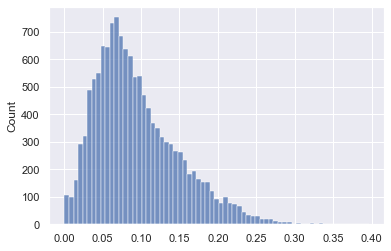

In [499]:
import seaborn as sns
sns.set();
sns.histplot(MSEs)

<AxesSubplot:xlabel='Date'>

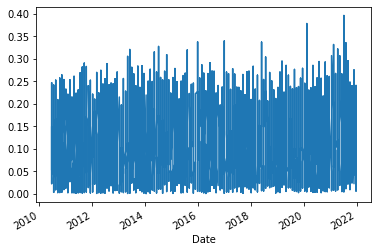

In [487]:
MSEs = (y_test - pred_proba_cdf).apply(lambda x: np.mean(x * x), axis = 1)
MSEs.plot()

The evaluation metric is the mean mean squared error of the CDF for each of the 100 assets, over the time horizon

In [496]:
MSEs.groupby(MSEs.index).mean().mean()

0.09460007494963317

In [310]:
preds = lgbr.predict(df3.iloc[:, list(range(100)) + [101]])
df3['preds'] = preds
pred_ranks = pd.pivot_table(df3[['preds','asset']], values='preds', columns = 'asset', index = df3.index)
pred_ranks

asset,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-22,NaN,-0.653396,-0.557149,-0.549970,NaN,-0.417883,0.763370,1.074120,-0.033392,-1.034526,...,NaN,-0.845243,-1.880089,-1.623053,-1.655979,-1.618277,-0.902910,-1.475782,-1.796626,-1.325829
2010-07-20,NaN,-0.137250,-0.637599,0.543576,NaN,-0.586061,0.506294,1.218134,-0.427480,-1.042594,...,NaN,-1.162598,-1.324986,-1.241355,-1.271065,-1.500301,-1.132688,-1.364860,-1.470496,-1.342633
2010-08-17,NaN,0.659791,-1.174979,-0.323770,NaN,0.421751,-0.085023,-0.188589,-1.108147,-0.159625,...,NaN,-0.391057,-0.982483,-1.101926,-0.839647,-1.350051,-1.022905,-0.965187,-0.916119,-0.763730
2010-09-14,NaN,-0.391248,-0.845105,-0.521168,NaN,-0.170083,0.764256,0.687040,-0.484280,-0.703662,...,NaN,-0.716353,-1.776548,-1.783967,-1.544350,-1.846387,-1.038830,-1.669408,-1.815197,-1.374976
2010-10-12,NaN,0.202691,-0.543941,-0.353677,NaN,0.604666,0.415659,1.222801,-0.035208,-0.023580,...,NaN,-0.402729,-1.184410,-1.166532,-0.950433,-1.224115,-0.857676,-0.941232,-1.181095,-1.028868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,-0.544923,0.537398,0.469099,-0.266494,-0.216472,0.305737,0.724325,0.069676,1.043097,-0.440383,...,-1.012226,-0.435859,-1.716929,-1.768870,-1.048761,-2.383788,-0.453649,-1.506602,-1.517285,-1.207126
2021-09-30,1.199218,0.289316,-1.021478,-0.490302,0.133671,0.858315,-0.253101,0.583858,-0.549460,-0.385631,...,-1.326523,-1.764489,-1.790968,-2.101254,-0.593989,-1.728014,-0.998138,-1.316324,-1.410494,-1.741436
2021-10-28,0.588268,0.054634,1.137148,-0.241308,-0.249379,0.551386,-0.539247,-0.425140,-0.174080,-0.467491,...,-0.985434,-0.814571,-1.352621,-1.450561,-0.868554,-1.356917,0.369093,-1.288976,-1.219563,-1.139517


## Metrics

Normalised Cumulative Discounted Gain: A perfect score procues a ranking of 1

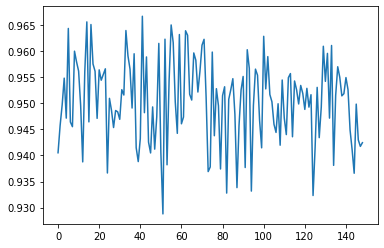

In [490]:
from sklearn.metrics import ndcg_score
ndcg_scores = np.zeros(149)

for i in range(149):
    ndcg_scores[i] = ndcg_score(quantiles.shift(-1).iloc[[i]].T.dropna().T.values, pred_ranks.iloc[[i]].T.dropna().T.values)
import matplotlib.pyplot as plt
plt.plot(ndcg_scores)

# Portfolio

Map Predictions (Ranks, Probabilities) to weights via some function


$$f(\hat{y}_{t}) \rightarrow w_{t}$$

Maximise the *information ratio* of our portfolio

$$E[R_{p, t}] / SD(R_{p, t}), R_{p, t} = w_{t} \cdot R_{t}$$



In [353]:
from scipy.special import softmax
weights = pred_ranks.fillna(-999).apply(lambda x: softmax(x), axis = 1)
weights

asset,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-22,0.000000,0.009050,0.009965,0.010037,0.000000,0.011454,0.037322,0.050924,0.016824,0.006182,...,0.000000,0.007471,0.002654,0.003432,0.003321,0.003448,0.007052,0.003977,0.002885,0.004620
2010-07-20,0.000000,0.014695,0.008910,0.029031,0.000000,0.009381,0.027968,0.056992,0.010993,0.005943,...,0.000000,0.005271,0.004481,0.004872,0.004729,0.003760,0.005431,0.004306,0.003874,0.004402
2010-08-17,0.000000,0.034781,0.005553,0.013007,0.000000,0.027413,0.016515,0.014890,0.005937,0.015328,...,0.000000,0.012161,0.006731,0.005974,0.007765,0.004661,0.006465,0.006849,0.007193,0.008377
2010-09-14,0.000000,0.012536,0.007962,0.011008,0.000000,0.015639,0.039809,0.036851,0.011422,0.009172,...,0.000000,0.009056,0.003137,0.003114,0.003957,0.002925,0.006560,0.003492,0.003018,0.004687
2010-10-12,0.000000,0.016880,0.008001,0.009677,0.000000,0.025232,0.020887,0.046818,0.013307,0.013462,...,0.000000,0.009214,0.004217,0.004293,0.005328,0.004053,0.005846,0.005378,0.004231,0.004926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02,0.008022,0.023677,0.022114,0.010598,0.011141,0.018781,0.028544,0.014832,0.039260,0.008906,...,0.005027,0.008946,0.002485,0.002359,0.004847,0.001275,0.008789,0.003066,0.003034,0.004137
2021-09-30,0.052141,0.020990,0.005659,0.009626,0.017965,0.037079,0.012202,0.028180,0.009073,0.010688,...,0.004171,0.002692,0.002622,0.001922,0.008678,0.002792,0.005793,0.004214,0.003835,0.002755
2021-10-28,0.026105,0.015310,0.045196,0.011388,0.011296,0.025160,0.008454,0.009476,0.012180,0.009083,...,0.005411,0.006419,0.003748,0.003398,0.006082,0.003732,0.020967,0.003994,0.004282,0.004638


In [354]:
rets = (weights * (np.exp(df2.shift(-1).iloc[:-1]) - 1)).sum(axis = 1)
display(rets)

Date
2010-06-22    0.045082
2010-07-20    0.053151
2010-08-17    0.060502
2010-09-14    0.094842
2010-10-12    0.030618
                ...   
2021-09-02    0.055745
2021-09-30    0.025942
2021-10-28    0.010531
2021-11-25    0.007926
2021-12-23    0.478729
Length: 149, dtype: float64

<AxesSubplot:xlabel='Date'>

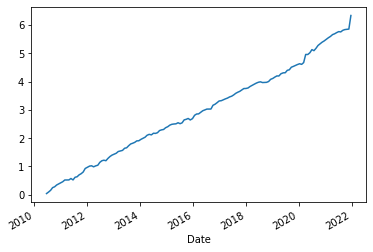

In [352]:
rets.cumsum().plot()

In [362]:
rets.mean() / np.std(rets, ddof = 1)

0.8095937197304072

# Test Cases

Probabilities rounded to 5dp have to sum to 1:

$|1 - Sum_{j = 1}^{5} P_{ij} | < 1e-5$

100 x 7 dataframe

Long format

(T x N) x F


